In [66]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 
import seaborn as sns

In [67]:
data = pd.read_csv("vgsales.csv")

In [68]:
data


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [69]:
data.shape

(16598, 11)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [71]:
# Very clean data set without missing value
data.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [72]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


grouping the sales by genres of different games

In [73]:
genre_size = data.groupby('Genre').size()
genre_size

Genre
Action          3316
Adventure       1286
Fighting         848
Misc            1739
Platform         886
Puzzle           582
Racing          1249
Role-Playing    1488
Shooter         1310
Simulation       867
Sports          2346
Strategy         681
dtype: int64

<AxesSubplot:ylabel='None'>

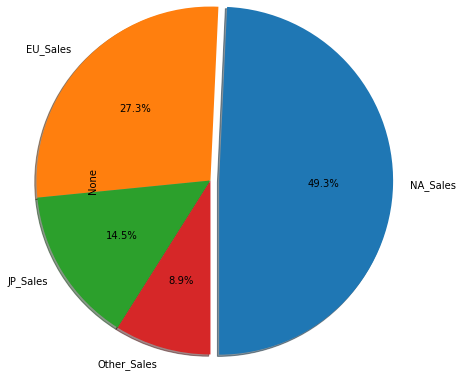

In [74]:
data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().plot.pie(autopct="%1.1f%%",explode=(0.1,0,0,0),radius=2,startangle=270,shadow=True)

The above pie chart shows that almost 50% of the total sales of video games is from North American.

<AxesSubplot:xlabel='Year'>

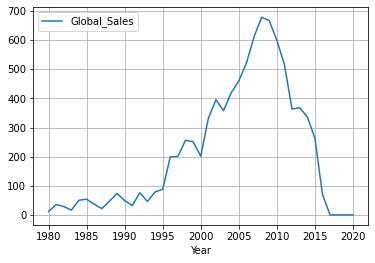

In [75]:
data.groupby('Year')['Global_Sales'].sum().plot(kind="line", grid=True, legend=True)

The above line graph shows that the global maximum sales its between the year 2005 and 2010 with peak in year 2008.

<AxesSubplot:xlabel='Year'>

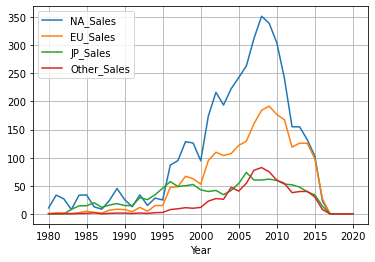

In [76]:
data.groupby('Year')['NA_Sales'].sum().plot(kind='line', grid=True, legend=True)
data.groupby('Year')['EU_Sales'].sum().plot(kind='line', grid=True, legend=True)
data.groupby('Year')['JP_Sales'].sum().plot(kind='line', grid=True, legend=True)
data.groupby('Year')['Other_Sales'].sum().plot(kind='line', grid=True, legend=True)

The line graph above clearly shows the peak is between year 2005 and 2010.

<AxesSubplot:xlabel='Platform'>

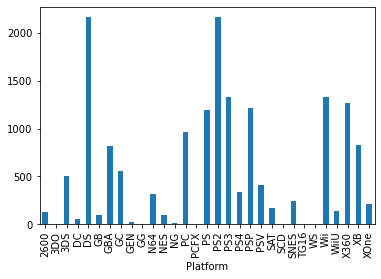

In [77]:
data.groupby('Platform').size().plot(kind='bar')

The graph abouve shows that Sony PS2 and DS was a Great success during the early 2000.

In [78]:
print(data.groupby('Publisher').size().idxmax())   
print(data.groupby('Publisher').size().max())     

Electronic Arts
1351


The above publisher is the major publisher among the 16,540 publishers

<AxesSubplot:ylabel='None'>

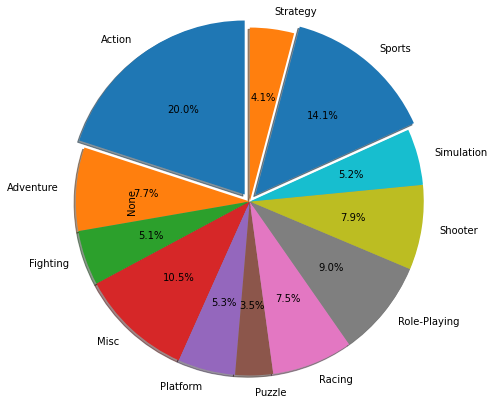

In [79]:
data.groupby('Genre').size().plot.pie(autopct="%1.1f%%",explode=(0.1,0,0,0,0,0,0,0,0,0,0.1,0),radius=2,startangle=90,shadow=True)

According to the pie chart, most games are publishes in sports and action genre.

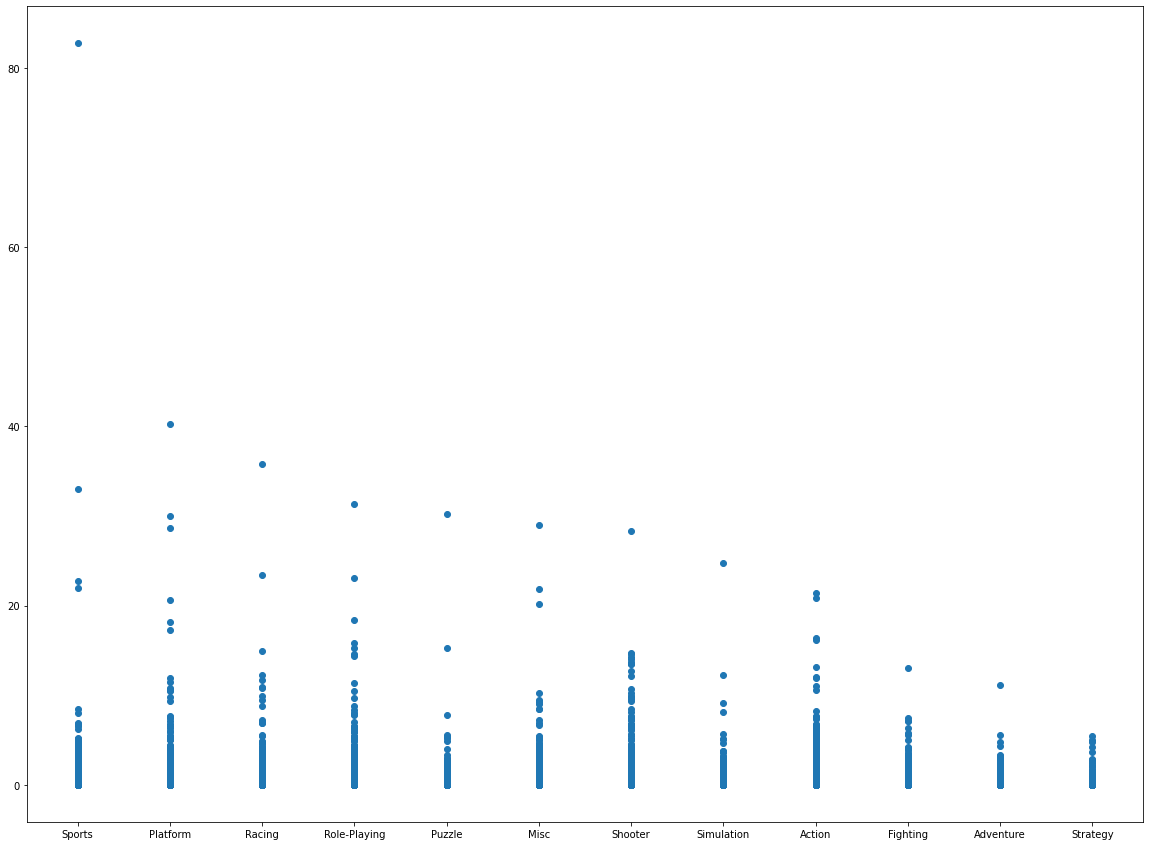

In [80]:
plt.figure(figsize = (20, 15))
plt.scatter(data.Genre, data.Global_Sales)
plt.show()

In [81]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


The above figure shows that sport has the highest games sales from the genre against global sales.

The Vgsales dataset below shows the sum of each video games per countries sales from MYSQL
Genre = Games
sum_NA_Sales = Total of each video games in North America
sum_EU_Sales = Total of each video games in Europe
sum_JP_Sales = Total of each video games in Japan
sum_Other_Sales= Total of each video games in Other countries
sum_Global_Sales = Total of each video games around the globe
numbers are in Millions.

In [82]:
#df1=pd.pivot_table(data, index=['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales'],values=['Name'],aggfunc=np.sum)
#df1 

<AxesSubplot:xlabel='Genre', ylabel='NA_Sales'>

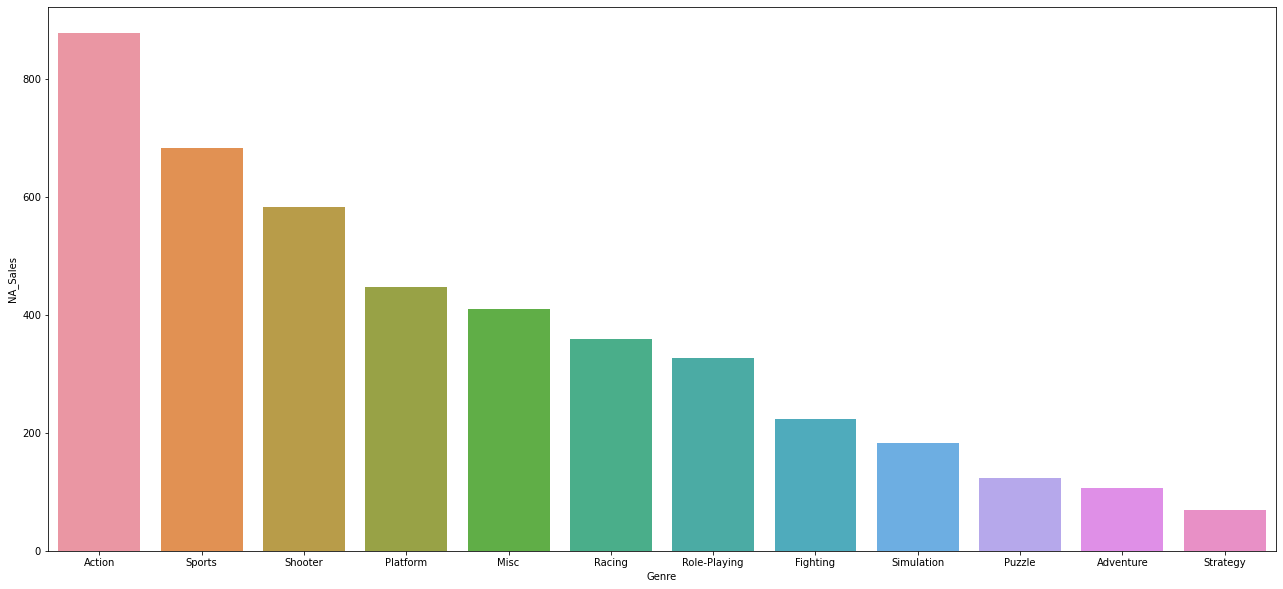

In [83]:
genre_na_sales = data.groupby(['Genre'])['NA_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(22,10))
plt.ylabel('NA_Sales')
sns.barplot(x= genre_na_sales.index, y= genre_na_sales.values)

North America has more sales in Action video games

<AxesSubplot:xlabel='Genre', ylabel='EU_Sales'>

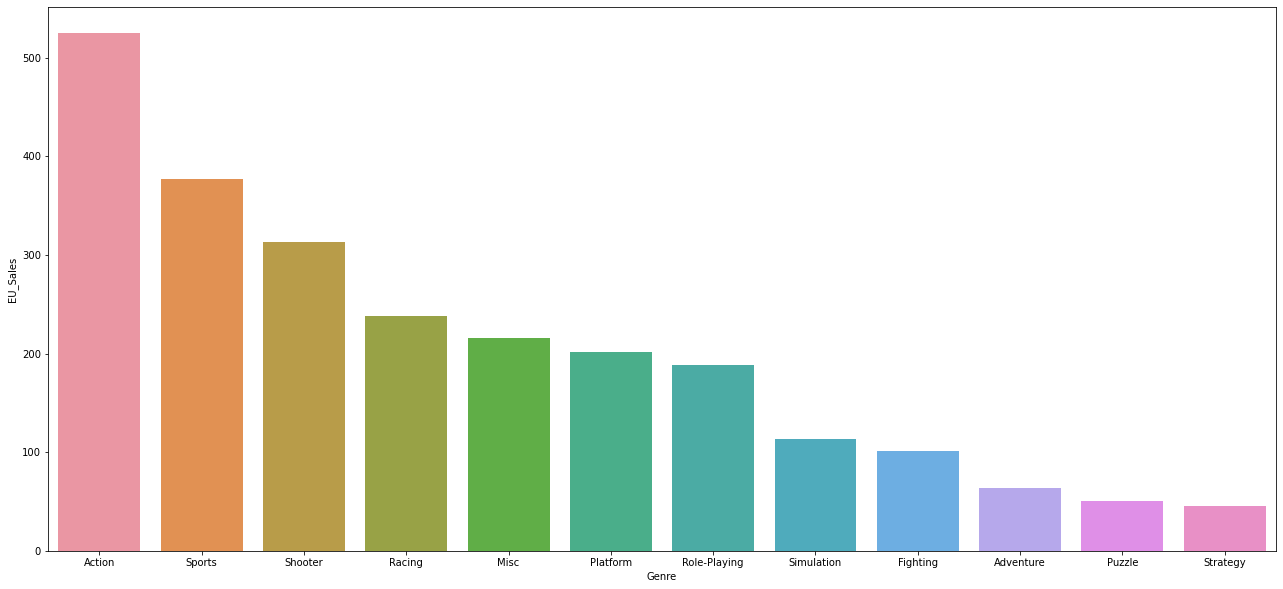

In [84]:
genre_na_sales = data.groupby(['Genre'])['EU_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(22,10))
plt.ylabel('EU_Sales')
sns.barplot(x= genre_na_sales.index, y= genre_na_sales.values)

EU has more sales in Action also

<AxesSubplot:xlabel='Genre', ylabel='Other_Sales'>

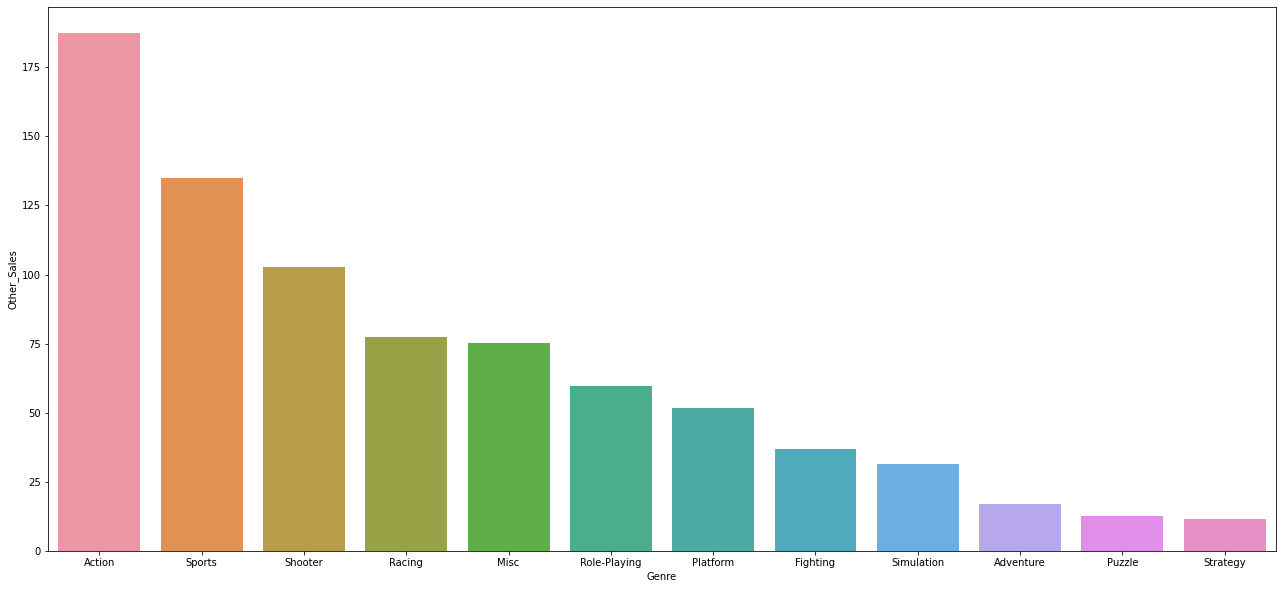

In [85]:
genre_na_sales = data.groupby(['Genre'])['Other_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(22,10))
plt.ylabel('Other_Sales')
sns.barplot(x= genre_na_sales.index, y= genre_na_sales.values)

Generally, action movies seems to thhrive very well in most countries

<AxesSubplot:xlabel='Genre', ylabel='JP_Sales'>

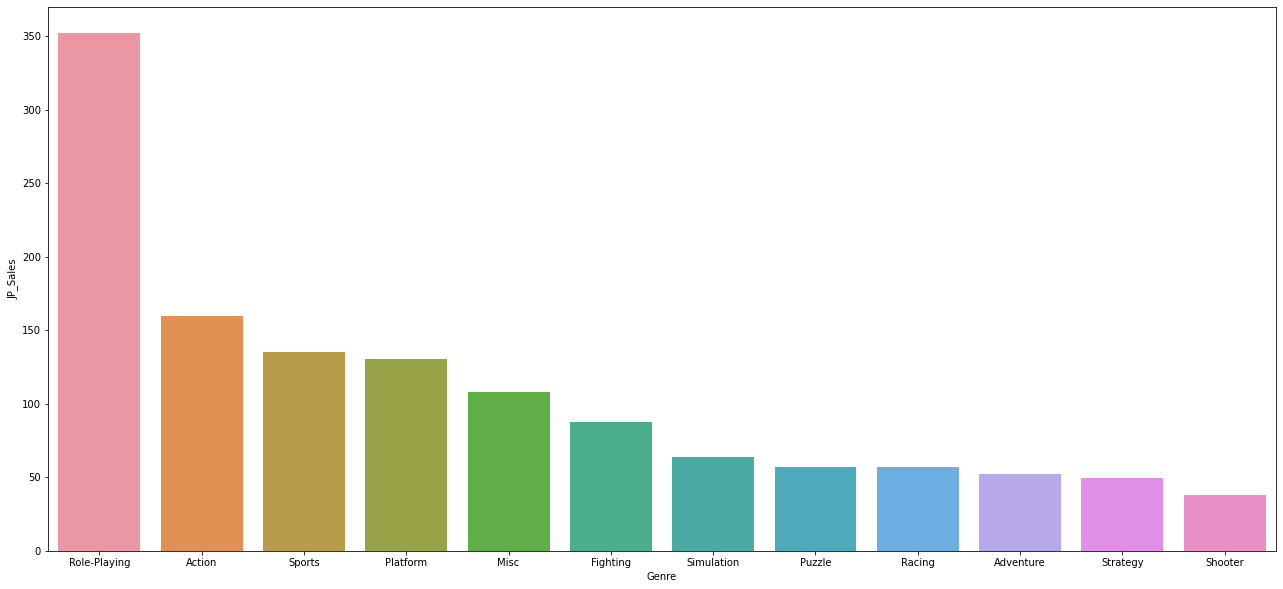

In [86]:
genre_na_sales = data.groupby(['Genre'])['JP_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(22,10))
plt.ylabel('JP_Sales')
sns.barplot(x= genre_na_sales.index, y= genre_na_sales.values)

Japan has more sales in Role-Playing video games unlike other countries that has more sales in action. This means that Vestors must make research in Japan market when investing in Video games and focus on the kind and type of market that is needed. The investors cannot assume that action video game will thrive in Japn since its doing well in other countries' market. That will be a total fall out.

### Top 3 years game releases by genre

In [87]:
import seaborn as sns

(array([0, 1, 2]),
 [Text(0, 0, '2009.0'), Text(1, 0, '2008.0'), Text(2, 0, '2010.0')])

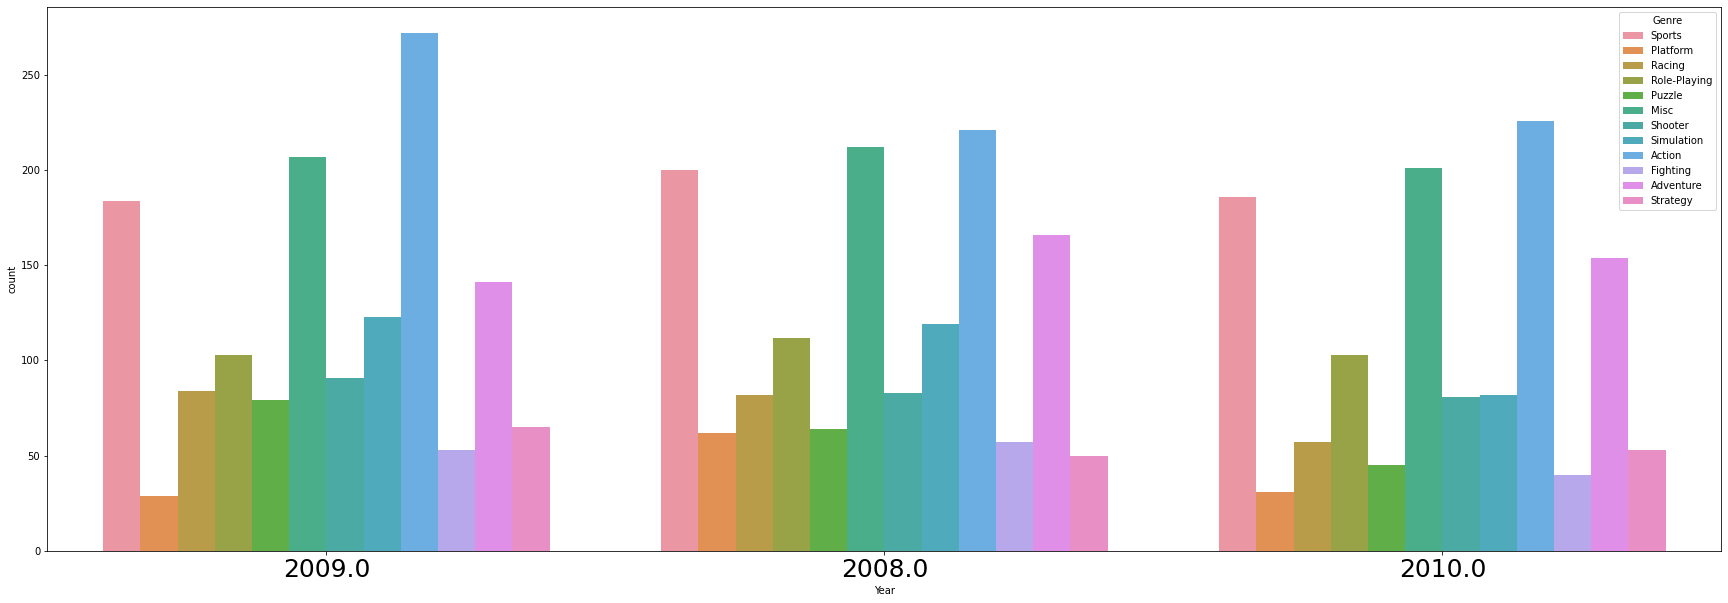

In [88]:
plt.figure(figsize=(30, 10))
sns.countplot(x="Year", data=data, hue='Genre', order=data.Year.value_counts().iloc[:3].index)
plt.xticks(size=25, rotation=0)

Action video games has the highest sales globally 

### Global sales (Highest sales all over the world)

In [89]:
data_year = data.groupby(by=['Year'])['Global_Sales'].sum()
data_year = data_year.reset_index()
data_year.sort_values(by=['Global_Sales'], ascending=False)

,Year,Global_Sales
28,2008.0,678.90
29,2009.0,667.30
27,2007.0,611.13
30,2010.0,600.45
26,2006.0,521.04
31,2011.0,515.99
25,2005.0,459.94
24,2004.0,419.31
22,2002.0,395.52
33,2013.0,368.11


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '1980.0'),
  Text(1, 0, '1981.0'),
  Text(2, 0, '1982.0'),
  Text(3, 0, '1983.0'),
  Text(4, 0, '1984.0'),
  Text(5, 0, '1985.0'),
  Text(6, 0, '1986.0'),
  Text(7, 0, '1987.0'),
  Text(8, 0, '1988.0'),
  Text(9, 0, '1989.0'),
  Text(10, 0, '1990.0'),
  Text(11, 0, '1991.0'),
  Text(12, 0, '1992.0'),
  Text(13, 0, '1993.0'),
  Text(14, 0, '1994.0'),
  Text(15, 0, '1995.0'),
  Text(16, 0, '1996.0'),
  Text(17, 0, '1997.0'),
  Text(18, 0, '1998.0'),
  Text(19, 0, '1999.0'),
  Text(20, 0, '2000.0'),
  Text(21, 0, '2001.0'),
  Text(22, 0, '2002.0'),
  Text(23, 0, '2003.0'),
  Text(24, 0, '2004.0'),
  Text(25, 0, '2005.0'),
  Text(26, 0, '2006.0'),
  Text(27, 0, '2007.0'),
  Text(28, 0, '2008.0'),
  Text(29, 0, '2009.0'),
  Text(30, 0, '2010.0'),
  Text(31, 0, '2011.0'),
  Text(32, 0, '2012.0'),
  T

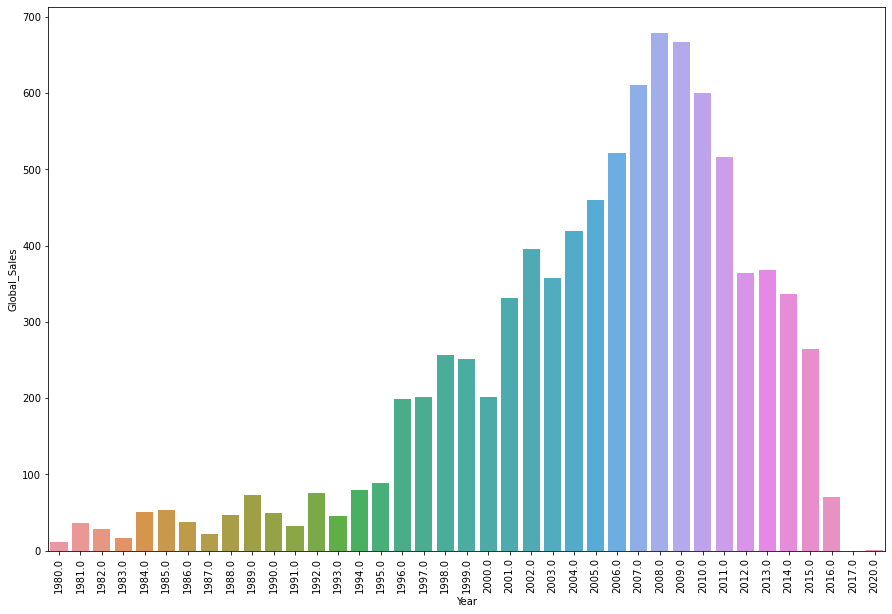

In [90]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Year", y="Global_Sales", data=data_year)
plt.xticks(rotation=90)

The peak sales was achieved in 2008, slightly low in 2009 to 2010, and afterwards, sudden decline till 2020

Conclusion: With the above analysics of Vgsales, it shows that all countries sales are good but one better and stand out which is the NA_Sales, the global sales peaked in 2018 which NA_Sales has the maximum record. I would suggest to any investor that would like to invest in video games in North America to go for Action games and for Japan to invest in Role-playing games and as for Europe to invest in Action games.